**Neural Network For MNIST classification**

In [ ]:
#import the tensorflow library
import tensorflow as tf

In [ ]:
# Load in the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.9148 - val_loss: 0.1436 - val_accuracy: 0.9592
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1438 - accuracy: 0.9573 - val_loss: 0.1051 - val_accuracy: 0.9683
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1073 - accuracy: 0.9680 - val_loss: 0.0852 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0894 - accuracy: 0.9720 - val_loss: 0.0840 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0746 - accuracy: 0.9772 - val_loss: 0.0759 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0644 - accuracy: 0.9805 - val_loss: 0.0724 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0594 - accuracy: 0.9811 - val_loss: 0.0757 - val_accuracy:

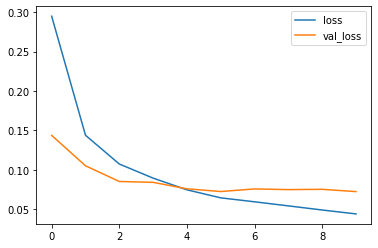

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

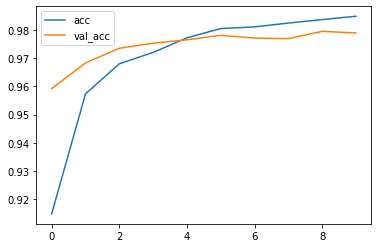

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0723 - accuracy: 0.9789
[0.07231408357620239, 0.9789000153541565]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
print(cm)

[[ 968    0    3    2    1    0    2    1    2    1]
 [   0 1118    3    0    0    1    4    0    9    0]
 [   4    2 1006    2    1    0    1    8    8    0]
 [   0    0    2  991    0    7    0    4    3    3]
 [   1    0    3    0  968    0    2    1    1    6]
 [   2    1    0   12    2  867    3    2    2    1]
 [   4    2    1    1    4    4  939    0    3    0]
 [   1    6    9    3    0    0    0 1001    1    7]
 [   1    0    2    5    6    2    0    6  946    6]
 [   1    2    0    7    9    1    0    3    1  985]]


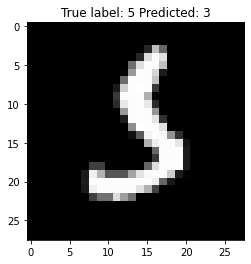

In [ ]:
# Show some misclassified examples
import numpy as np
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

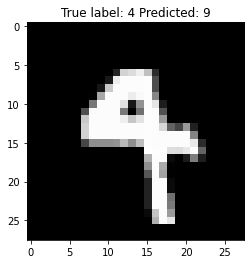

In [ ]:
# Show some misclassified examples
import numpy as np
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));